<a href="https://colab.research.google.com/github/hadi-yazdi/hadi-yazdi.github.io/blob/master/(example)Logistic_Regression_%26_Decision_Tree_%26_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## An example of *Logistic Regression*, *Decision Tree* and *Random Forest* binary clasification methods on the Titanic dataset.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train_df = pd.read_csv('C:\\Users\\HADI\\Desktop\\Machine Learning\\Code Quest\\11\\train_titanic.csv')
test_df = pd.read_csv('C:\\Users\\HADI\\Desktop\\Machine Learning\\Code Quest\\11\\test_titanic.csv')

In [ ]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test_df.shape

(418, 11)

In [ ]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

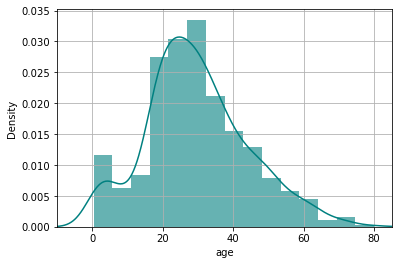

In [ ]:
import matplotlib.pyplot as plt
ax = train_df['Age'].hist(bins=15, density=True, stacked= True, color= 'teal', alpha=0.6)
train_df['Age'].plot(kind= 'density', color='teal')
ax.set(xlabel='age')
plt.xlim(-10,85)
plt.grid()
plt.show()

C:\Users\HADI\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\HADI\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


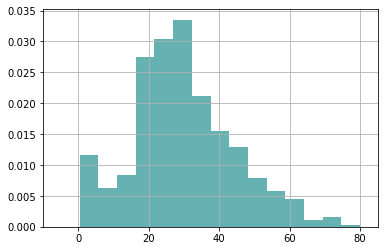

In [ ]:
# I could not find a second solution for the above ploting code
plt.hist(train_df['Age'], bins=15, density=True, color='teal', alpha=0.6)
#plt.plot(train_df['Age'])
plt.grid()
plt.xlim(-10,85)
plt.show()

In [ ]:
print(train_df['Age'].mean(skipna=True))
print(train_df['Age'].median(skipna=True))

29.69911764705882
28.0


In [ ]:
print(train_df['Cabin'].isnull().sum()/train_df.shape[0])

0.7710437710437711


In [ ]:
print(train_df['Embarked'].isnull().sum()/train_df.shape[0])

0.002244668911335578


In [ ]:
print(train_df['Age'].isnull().sum()/train_df.shape[0])

0.19865319865319866


In [ ]:
print(train_df['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [ ]:
print(train_df['Embarked'].value_counts().idxmax())

S


In [ ]:
train_data = train_df.copy()
train_data['Age'].fillna(train_df['Age'].median(skipna=True), inplace=True)
train_data['Embarked'].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop(['Cabin'], axis=1, inplace=True)

In [ ]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
training = pd.get_dummies(train_data, columns=['Pclass','Embarked','Sex'])
training.drop(['Name','PassengerId','Ticket','Sex_female'], axis=1, inplace=True)
final_train = training
final_train.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,1


In [ ]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
test_data =test_df.copy()
test_data['Age'].fillna(train_df['Age'].median(skipna=True), inplace=True)
test_data['Fare'].fillna(train_df['Age'].median(skipna=True), inplace=True)
test_data.drop(['Cabin'], axis=1, inplace=True)

In [ ]:
import numpy as np
#test_data['TravelAlone'] = np.where((test_data['SibSp']+test_data['Parch'])>0, 0, 1)
testing = pd.get_dummies(test_data, columns=['Pclass','Embarked','Sex'])
testing.drop(['Name','PassengerId','Ticket','Sex_female'], axis=1, inplace=True)
final_test = testing
final_test.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,0,0,7.8292,0,0,1,0,1,0,1
1,47.0,1,0,7.0000,0,0,1,0,0,1,0
2,62.0,0,0,9.6875,0,1,0,0,1,0,1
3,27.0,0,0,8.6625,0,0,1,0,0,1,1
4,22.0,1,1,12.2875,0,0,1,0,0,1,0


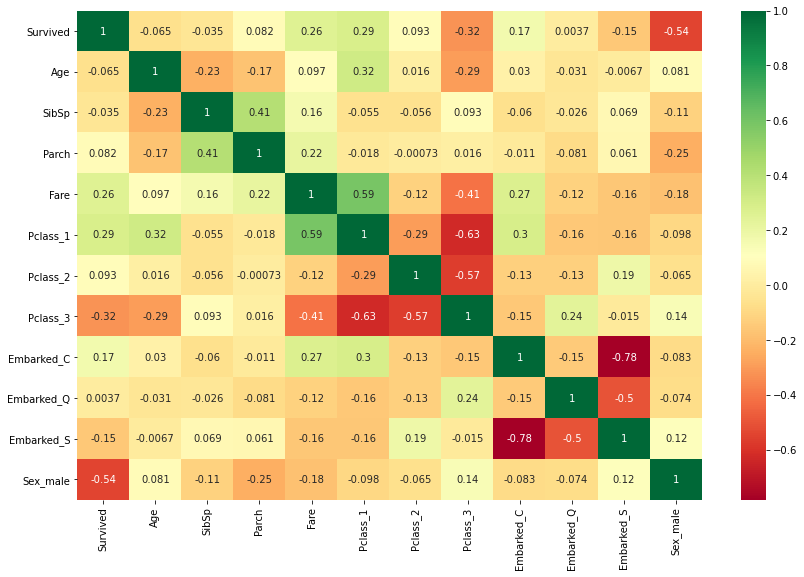

In [ ]:
import seaborn as sb
x = final_train.drop(['Survived'], axis=1)

plt.figure(figsize=[14,9])
sb.heatmap(final_train.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

y = final_train['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

Accuracy = accuracy_score(y_test,y_pred)
print(Accuracy)

from sklearn.metrics import confusion_matrix

con_mat = confusion_matrix(y_test,y_pred)
print(con_mat)

0.7821229050279329
[[91  9]
 [30 49]]


C:\Users\HADI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
predict = logreg.predict(final_test)
final_pred = final_test.copy()
final_pred['Survived'] = predict

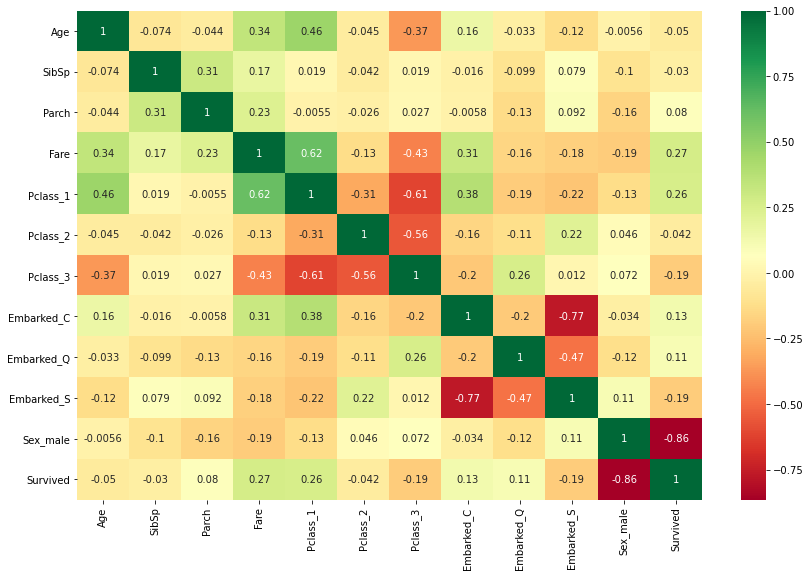

In [ ]:
plt.figure(figsize=[14,9])
sb.heatmap(final_pred.corr(), annot=True, cmap='RdYlGn')
plt.show()

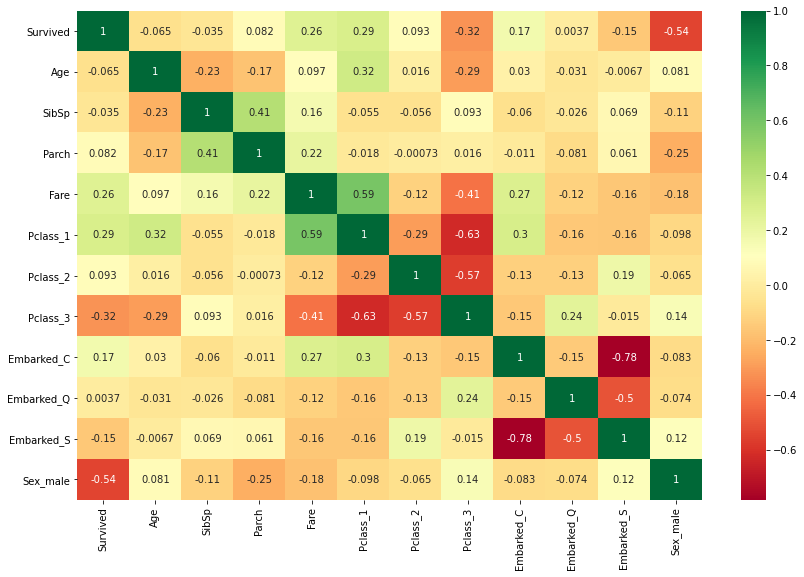

In [ ]:
plt.figure(figsize=[14,9])
sb.heatmap(training.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [ ]:
training['UnderAge']=np.where((training['Age']>10),0,1)
training['TravelAlone']=np.where((training['SibSp']+training['Parch']>0),0,1)
final_train = training.copy()


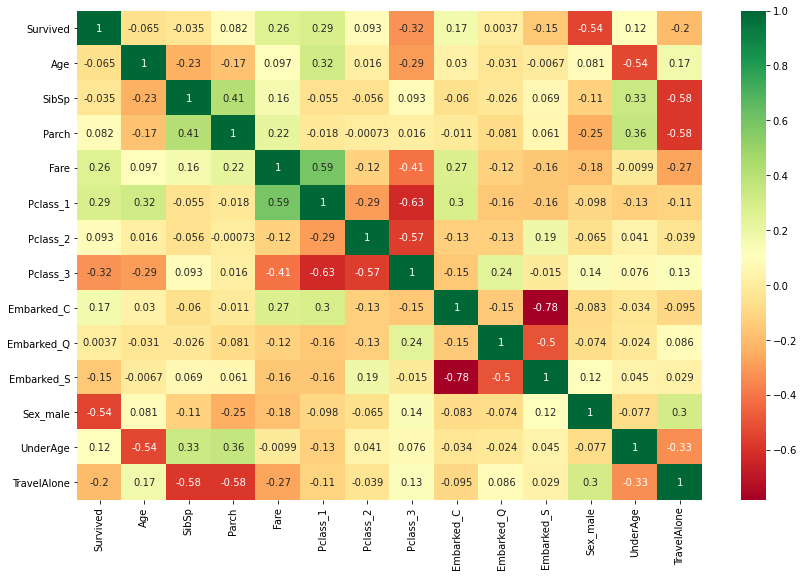

In [ ]:
plt.figure(figsize=[14,9])
sb.heatmap(final_train.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [ ]:
x = final_train.drop(['Age','SibSp','Parch','Embarked_Q','Survived'], axis=1)
y = final_train['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

logreg2 = LogisticRegression()
logreg2.fit(x_train,y_train)
y_pred = logreg2.predict(x_test)

Accuracy = accuracy_score(y_test,y_pred)
print(Accuracy)

con_mat = confusion_matrix(y_test,y_pred)
print(con_mat)

0.7597765363128491
[[94  6]
 [37 42]]


C:\Users\HADI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
x

,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_S,Sex_male,UnderAge,TravelAlone
0,7.2500,0,0,1,0,1,1,0,0
1,71.2833,1,0,0,1,0,0,0,0
2,7.9250,0,0,1,0,1,0,0,1
3,53.1000,1,0,0,0,1,0,0,0
4,8.0500,0,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
886,13.0000,0,1,0,0,1,1,0,1
887,30.0000,1,0,0,0,1,0,0,1
888,23.4500,0,0,1,0,1,0,0,0
889,30.0000,1,0,0,1,0,1,0,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(x_train, y_train)

y_pred = decision_tree.predict(x_test)

acc_decision_tree = decision_tree.score(x_train, y_train)
print(acc_decision_tree)

acc_decision_tree2 = accuracy_score(y_test, y_pred)
print(acc_decision_tree2)

0.8328651685393258
0.770949720670391


In [ ]:
acc_decision_tree = []
acc_decision_tree2 = []
for d in range(1,31):
    decision_tree = DecisionTreeClassifier(max_depth=d)
    decision_tree.fit(x_train, y_train)
    y_pred = decision_tree.predict(x_test)
    acc_decision_tree.append(decision_tree.score(x_train, y_train))
    acc_decision_tree2.append(accuracy_score(y_test, y_pred))

print(max(acc_decision_tree))
print(acc_decision_tree.index(max(acc_decision_tree))+1)

print(max(acc_decision_tree2))
print(acc_decision_tree2.index(max(acc_decision_tree2))+1)

0.9353932584269663
18
0.8044692737430168
9


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

acc_rf = rf.score(x_train, y_train)
print(acc_rf)

acc_rf2 = r2_score(y_test, y_pred)
print(acc_rf2)

0.7691480165669777
0.37912105284606135


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

acc_rf = rf.score(x_train, y_train)
print(acc_rf)

acc_rf2 = accuracy_score(y_test, y_pred)
print(acc_rf2)

0.9353932584269663
0.8100558659217877


In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', C=1, gamma=1)
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

acc_svc = svc.score(x_train, y_train)
print(acc_svc)

acc_svc2 = accuracy_score(y_test, y_pred)
print(acc_svc2)

0.7921348314606742
0.7653631284916201


In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', C=1, gamma=1)
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

acc_svc = svc.score(x_train, y_train)
print(acc_svc)

acc_svc2 = accuracy_score(y_test, y_pred)
print(acc_svc2)

0.9058988764044944
0.7541899441340782


In [ ]:
acc_svc = []
acc_svc2 = []
for g in range(1,21):
    svc = SVC(kernel='rbf', C=1, gamma=g)
    svc.fit(x_train, y_train)
    y_pred = svc.predict(x_test)
    acc_svc.append(svc.score(x_train, y_train))
    acc_svc2.append(accuracy_score(y_test, y_pred))

print(max(acc_svc))
print(acc_svc.index(max(acc_svc))+1)

print(max(acc_svc2))
print(acc_svc2.index(max(acc_svc2))+1)

0.9213483146067416
14
0.7541899441340782
1
